# <center> Gaussian Mixture Models: Bag of Words Representation <center>

A Gaussian mixture model is a probabilistic model that assumes all the data points are 
generated from a mixture of a finite number of Gaussian distributions with unknown 
parameters. It attempts to find a mixture of multi-dimensional Gaussian probability
distributions that best model any input dataset allowing the model to learn automatically, i.e. 
in an unsupervised manner. The bag-of-words model is a way of representing text data when 
modelling text with machine learning algorithms which can be combined with GMM to get a 
useful model representation.

### Question:
Using a gaussian mixture model, perform a simple clustering on the given 2D Dataset. Try 
to find the optimal number of clusters using python (you may use any module to implement 
this). Now implement the same from scratch using python and a dummy dataset generated 
using scikit learn dataset generating functions such as make blob.
Dataset Link: Clustering_GMM
https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/Clustering_g

### Steps:
- Importing the Libraries
- Loading the dayaset
- Standadize the data
- Using Gaussian Mixture Model
-  Plot BIC scores to find optimal number of clusters
- Based on the plot, you can visually determine the optimal number of clusters
- Fit GMM with the optimal number of clusters
- Predict clusters
- Visualize the results

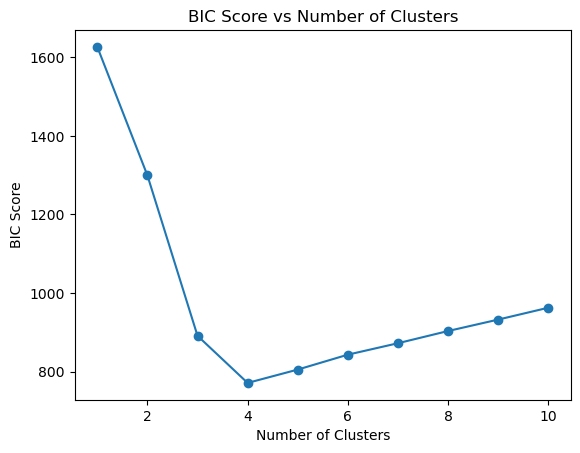

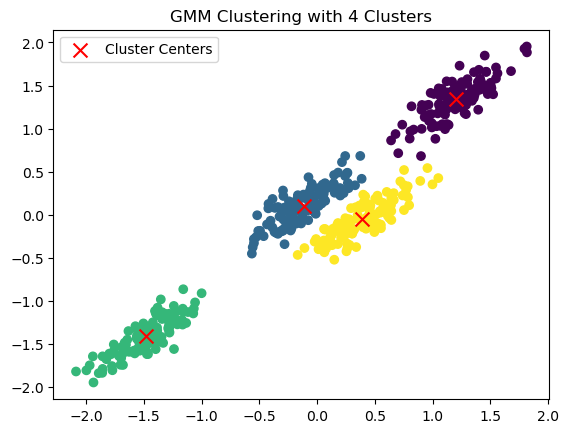

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Load the dataset
url = "/kaggle/input/dataset-for-dbscan/Clustering_gmm (2).csv"
data = pd.read_csv(url)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Using Gaussian Mixture Model
n_clusters = range(1, 11)  # trying different number of clusters
bic_scores = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))

# Plot BIC scores to find optimal number of clusters
plt.plot(n_clusters, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.show()

# Based on the plot, you can visually determine the optimal number of clusters

# Fit GMM with the optimal number of clusters
optimal_n_clusters = np.argmin(bic_scores) + 1
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_scaled)

# Predict clusters
predicted_clusters = gmm.predict(data_scaled)

# Visualize the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.show()


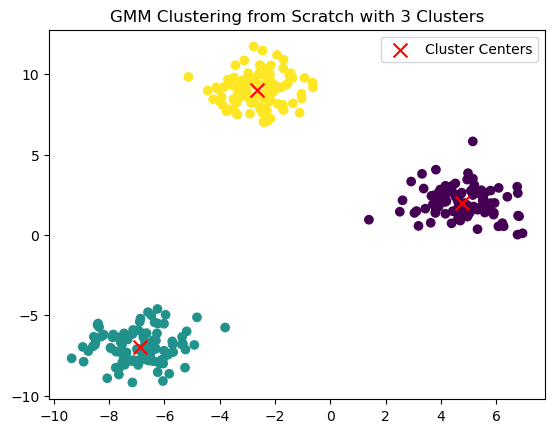

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Implement GMM from scratch
def gmm(X, n_clusters, n_iterations=100):
    n_samples, n_features = X.shape
    means = X[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = [np.eye(n_features)] * n_clusters
    weights = np.ones(n_clusters) / n_clusters
    
    for _ in range(n_iterations):
        # E-step
        responsibilities = []
        for k in range(n_clusters):
            numerator = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # M-step
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ X) / total_resp[:, np.newaxis]
        for k in range(n_clusters):
            diff = X - means[k]
            covariances[k] = ((responsibilities[:, k] * diff.T) @ diff) / total_resp[k]
            
    return means, covariances, weights

# Fit GMM from scratch
estimated_means, estimated_covariances, estimated_weights = gmm(data, n_clusters)

# Assign samples to clusters
def assign_clusters(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_clusters = len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    for k in range(n_clusters):
        responsibilities[:, k] = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
    cluster_assignments = np.argmax(responsibilities, axis=1)
    return cluster_assignments

predicted_assignments = assign_clusters(data, estimated_means, estimated_covariances, estimated_weights)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predicted_assignments, cmap='viridis')
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering from Scratch with {n_clusters} Clusters')
plt.show()
